In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Loading the Dataset
df = pd.read_csv('ecommerce_sales_analysis.csv')
perserved_df = df.copy() #perserving the original dataframe incase it is needed
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [4]:
#checking for # of duplicates
df.duplicated().sum()

0

In [5]:
#checking for # of null values
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [7]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


<Axes: title={'center': 'This representation is to check for outliers'}, xlabel='Columns', ylabel='Count'>

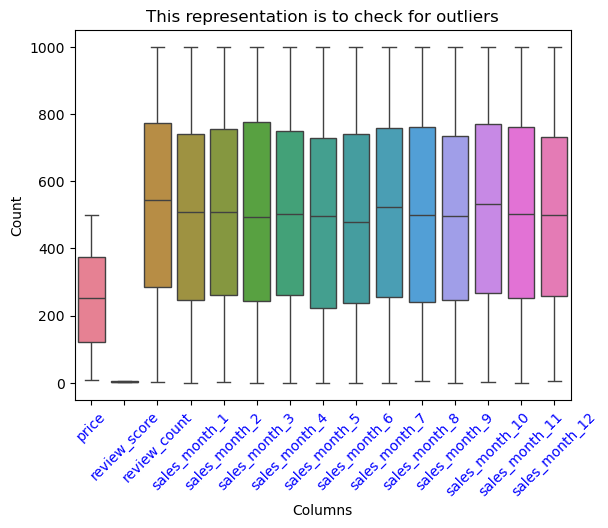

In [8]:
#Visual representation to visualize outliers

columns = ['price',
           'review_score',
           'review_count',
           'sales_month_1',
           'sales_month_2',
           'sales_month_3',
           'sales_month_4',
           'sales_month_5',
           'sales_month_6',
           'sales_month_7',
           'sales_month_8',
           'sales_month_9',
           'sales_month_10',
           'sales_month_11',
           'sales_month_12']

plt.title("This representation is to check for outliers")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45,color="b")
sns.boxplot(df[columns])

In [10]:
#Adding a new column for Total Annual Sales & Total Revenue
df['total_sales'] = df.loc[:, 'sales_month_1':'sales_month_12'].sum(axis=1)
df['total_revenue'] = df['price'] * df['total_sales']
df[['product_id', 'product_name', 'category', 'price', 'total_sales', 'total_revenue']].head(5)

,product_id,product_name,category,price,total_sales,total_revenue
0,1,Product_1,Clothing,190.40,6421,1222558.40
1,2,Product_2,Home & Kitchen,475.60,6027,2866441.20
2,3,Product_3,Toys,367.34,5580,2049757.20
3,4,Product_4,Toys,301.34,5022,1513329.48
4,5,Product_5,Books,82.23,6094,501109.62


In [11]:
#Identifying the Top 10 Best Products

top_prod = df.sort_values('total_sales', ascending=False)
top10 = top_prod.head(10)
top10

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,total_revenue
223,224,Product_224,Electronics,187.02,4.8,613,827,749,510,796,784,352,976,918,873,601,857,908,9151,1711420.02
285,286,Product_286,Clothing,22.79,3.1,728,951,933,701,786,600,572,825,834,596,573,710,840,8921,203309.59
733,734,Product_734,Health,263.92,2.7,30,366,992,375,993,857,782,165,851,941,908,715,969,8914,2352582.88
904,905,Product_905,Sports,213.61,4.0,520,850,967,941,833,965,785,977,332,399,627,696,411,8783,1876136.63
179,180,Product_180,Sports,73.07,3.2,268,725,756,405,598,757,923,598,833,909,985,717,569,8775,641189.25
852,853,Product_853,Books,108.90,4.4,305,80,1000,641,918,807,905,686,804,1000,732,318,874,8765,954508.50
238,239,Product_239,Health,324.51,4.9,575,875,864,660,723,561,844,836,731,548,860,811,411,8724,2831025.24
923,924,Product_924,Electronics,400.93,2.4,758,992,746,783,995,651,821,800,656,726,495,67,793,8525,3417928.25
936,937,Product_937,Electronics,14.10,2.1,883,957,510,885,918,734,91,692,716,383,913,770,890,8459,119271.90
196,197,Product_197,Toys,364.35,4.9,104,576,962,972,371,928,220,748,343,848,742,946,762,8418,3067098.30


In [12]:
#Identifying the Top 10 Worst Products

worst_prod = df.sort_values('total_sales')
worst10 = worst_prod.head(10)
worst10

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,total_revenue
122,123,Product_123,Health,162.41,4.4,650,52,283,309,155,154,4,613,394,466,75,162,305,2972,482682.52
691,692,Product_692,Toys,215.59,3.0,514,98,837,312,344,167,216,128,378,449,43,114,76,3162,681695.58
785,786,Product_786,Books,454.68,4.6,325,37,441,29,501,156,55,266,395,622,527,233,24,3286,1494078.48
665,666,Product_666,Home & Kitchen,80.67,4.4,655,153,677,387,8,116,593,185,95,244,212,477,154,3301,266291.67
135,136,Product_136,Home & Kitchen,164.99,1.3,68,483,72,52,673,438,254,215,20,81,81,807,215,3391,559481.09
178,179,Product_179,Sports,468.68,4.0,504,95,368,382,336,386,39,81,236,186,942,76,316,3443,1613665.24
94,95,Product_95,Electronics,386.63,1.9,610,12,325,37,72,546,217,787,270,137,381,265,490,3539,1368283.57
814,815,Product_815,Health,435.60,1.3,234,212,694,404,309,619,106,388,34,22,225,532,6,3551,1546815.60
543,544,Product_544,Clothing,337.49,2.0,913,89,732,438,32,339,321,114,283,111,79,358,668,3564,1202814.36
624,625,Product_625,Toys,311.04,1.7,268,9,843,490,442,626,640,71,165,3,183,28,141,3641,1132496.64


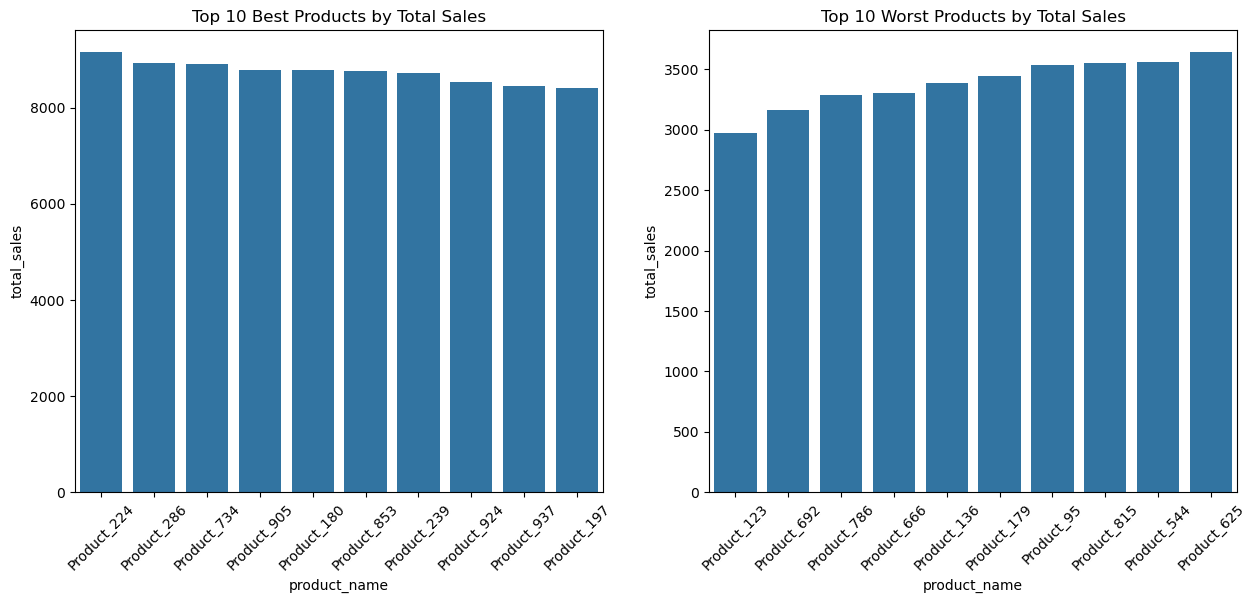

In [13]:
figure, axes = plt.subplots(1, 2, sharex=False,figsize=(15,6))
axes[0].set_title('Top 10 Best Products by Total Sales')
axes[1].set_title('Top 10 Worst Products by Total Sales')

#Top 10 Products by Sales
plot1=sns.barplot(ax=axes[0], data=top10,  x='product_name', y='total_sales')
plt.setp(plot1.get_xticklabels(), rotation=45)

#Top 10 Worst Products by Sales
plot2=sns.barplot(ax=axes[1], data=worst10, x='product_name', y='total_sales')
plt.setp(plot2.get_xticklabels(), rotation=45)
plt.show();

In [14]:
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
category_sales

category
Books             938229
Toys              917101
Sports            916371
Electronics       845120
Health            834414
Clothing          826536
Home & Kitchen    742141
Name: total_sales, dtype: int64

<Axes: title={'center': 'Total Sales by Category'}, xlabel='Category', ylabel='Total Sales'>

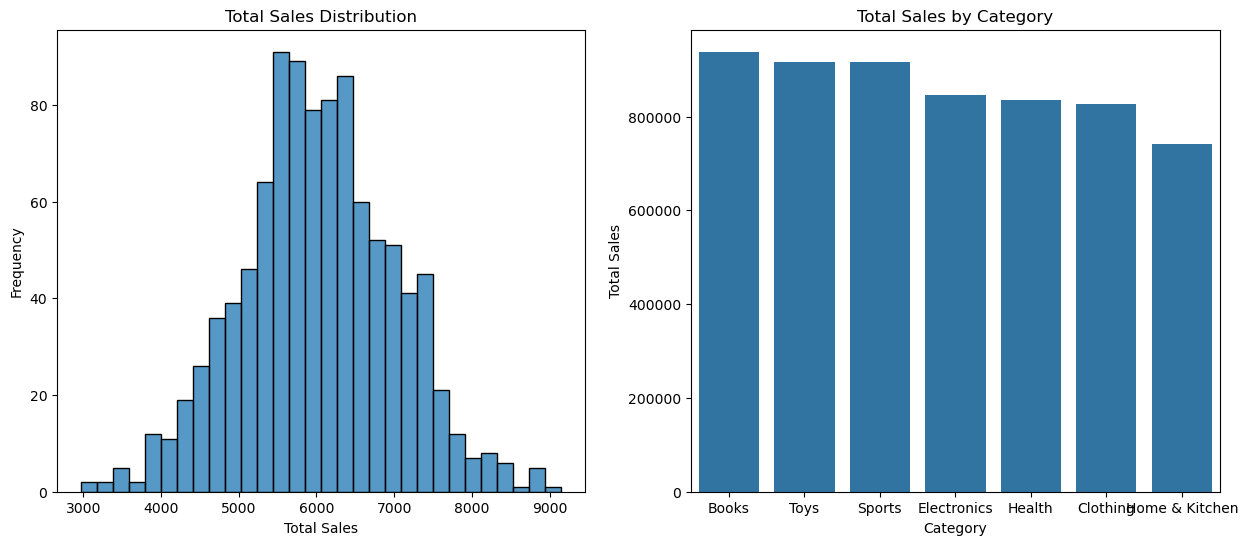

In [15]:
#Exploratory Data Analysis of Total Sales Distribution & Sales by Category

fig, axes = plt.subplots(1, 2, sharex=False,figsize=(15,6))
axes[0].set_title('Total Sales Distribution')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Total Sales')
axes[1].set_title('Total Sales by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Sales')

sns.histplot(df['total_sales'], bins=30, ax=axes[0])
sns.barplot(ax=axes[1], data=category_sales)

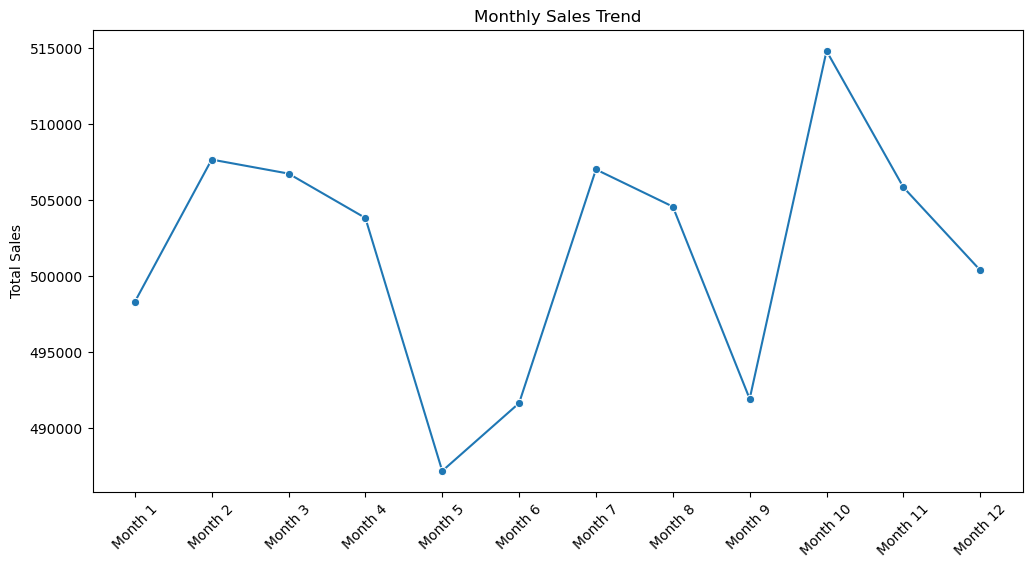

In [41]:
#Identifying Sales over Months
monthly_sales = df.loc[:, 'sales_month_1':'sales_month_12'].sum()
monthly_sales.index = [f'Month {i+1}' for i in range(12)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales,  marker='o')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

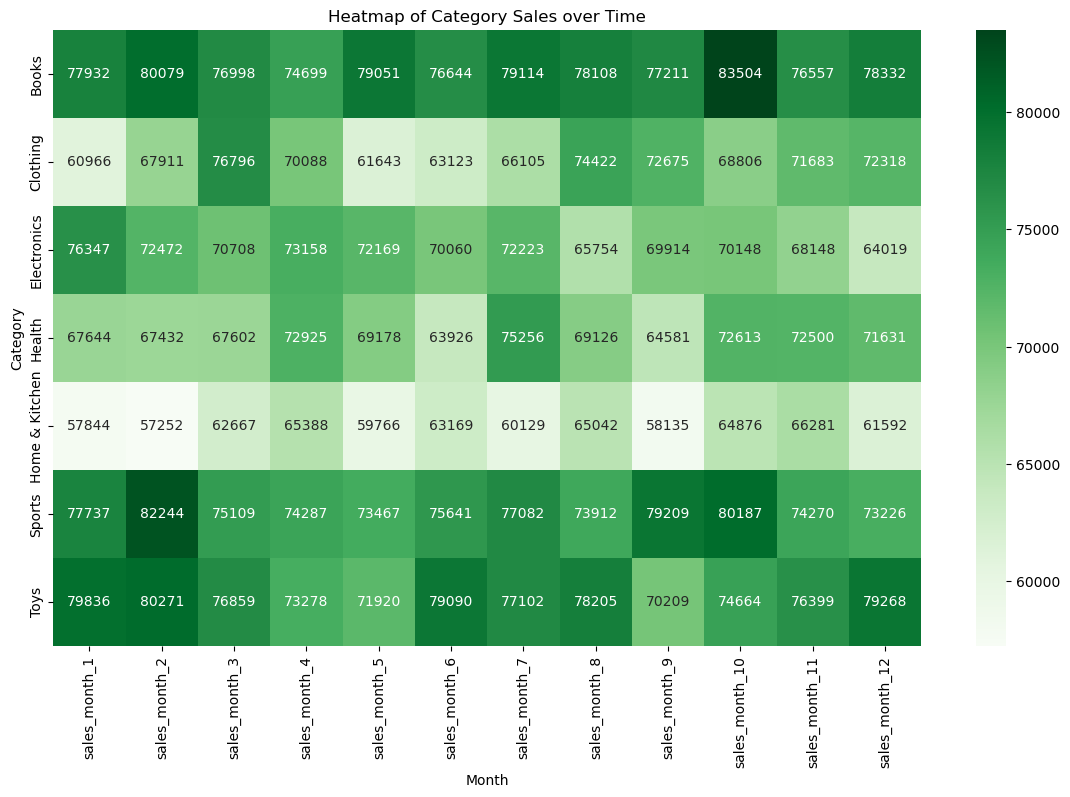

In [44]:
#Heatmap of Category Sales over Months

#Aggregating Category Sales Data
category_sales_df = df.groupby('category')[[f'sales_month_{i}' for i in range (1, 13)]].sum()

plt.figure(figsize=(14,8))
sns.heatmap(category_sales_df, cmap="Greens", fmt='d', annot=True)
plt.ylabel('Category')
plt.xlabel('Month')
plt.title('Heatmap of Category Sales over Time')
plt.show()

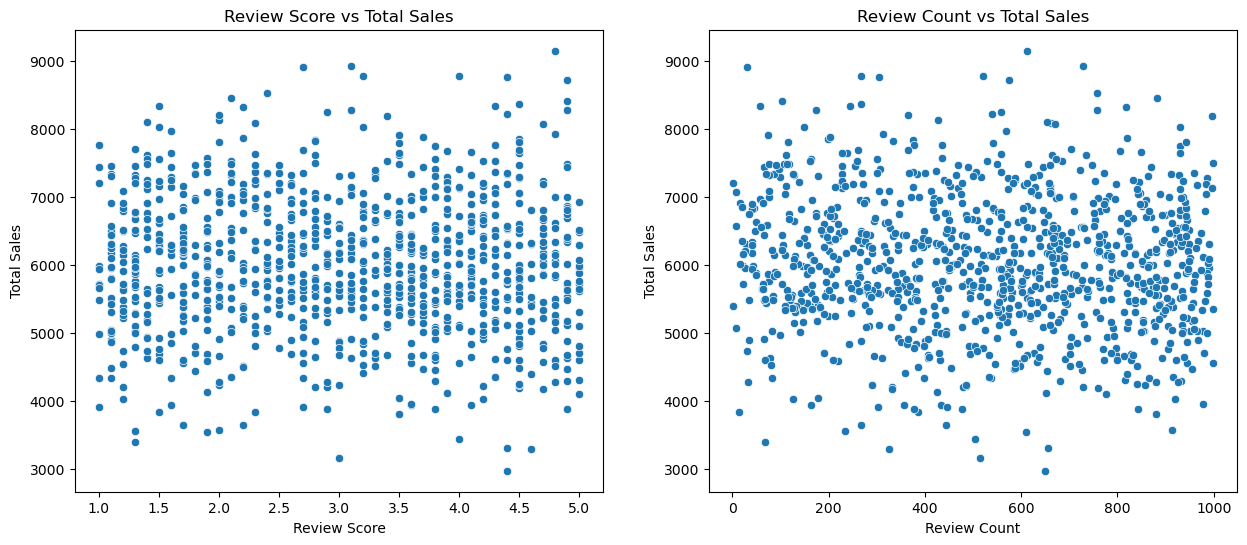

In [28]:
#Customer Behavior Analysis between Reviews & Sales

fig, axes = plt.subplots(1, 2, sharex=False,figsize=(15,6))
axes[0].set_title('Review Score vs Total Sales')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Total Sales')
axes[1].set_title('Review Count vs Total Sales')
axes[1].set_xlabel('Review Count')
axes[1].set_ylabel('Total Sales')

sns.scatterplot(data=df, x='review_score', y='total_sales', ax=axes[0])
sns.scatterplot(data=df, x='review_count', y='total_sales', ax=axes[1])
plt.show()